# Requirements

In [17]:
import pandas as pd
import missingno as msno
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,KFold, cross_val_predict,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Laboratory Exercise - Run Mode (8 points)

## The Mental Health Diagnosis and Treatment Monitoring Dataset
The dataset contains information on 500 individuals, focusing on mental health diagnoses, treatment plans, and outcomes. Key features include patient demographics such as age and gender, as well as specific mental health conditions (e.g., anxiety, depression, etc.). The dataset also captures symptom severity, mood scores, sleep quality, and stress levels, all rated on a scale of 1 to 10, providing insight into the patient's mental and physical well-being. Additionally, it includes details on treatment plans, including prescribed medications (e.g., SSRIs, antidepressants, etc.), therapy types (e.g., CBT, DBT, etc.), and treatment duration. Progress tracking is also incorporated, with ratings for treatment progress and AI-detected emotional state, alongside adherence to the treatment plan. The 'outcome' attribute, which indicates whether the treatment was improved, deteriorated, or unaffected, serves as the target variable for the analysis, while the remaining attributes can be used to explore and model the factors affecting mental health treatment outcomes.

Load the dataset into a `pandas` data frame.

In [18]:
df=pd.read_csv('mental_health_diagnosis_treatment_data.csv')

Preprocess the input and the output variables appropriately.

In [19]:
df.head()

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43.0,Female,Major Depressive Disorder,10,5,8,NaN,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,NaN,Deteriorated,7,Anxious,66
1,2,40.0,Female,Major Depressive Disorder,9,5,4,7.0,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7.0,No Change,7,Neutral,78
2,3,55.0,Female,Major Depressive Disorder,6,3,4,NaN,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,NaN,Deteriorated,5,Happy,62
3,4,34.0,Female,Major Depressive Disorder,6,3,6,5.0,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8.0,Deteriorated,10,Excited,72
4,5,52.0,Male,Panic Disorder,7,6,6,8.0,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5.0,Deteriorated,6,Excited,63


Explore the dataset using visualizations of your choice.

array([[<Axes: title={'center': 'Patient ID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Symptom Severity (1-10)'}>],
       [<Axes: title={'center': 'Mood Score (1-10)'}>,
        <Axes: title={'center': 'Sleep Quality (1-10)'}>,
        <Axes: title={'center': 'Physical Activity (hrs/week)'}>],
       [<Axes: title={'center': 'Treatment Duration (weeks)'}>,
        <Axes: title={'center': 'Stress Level (1-10)'}>,
        <Axes: title={'center': 'Treatment Progress (1-10)'}>],
       [<Axes: title={'center': 'Adherence to Treatment (%)'}>, <Axes: >,
        <Axes: >]], dtype=object)

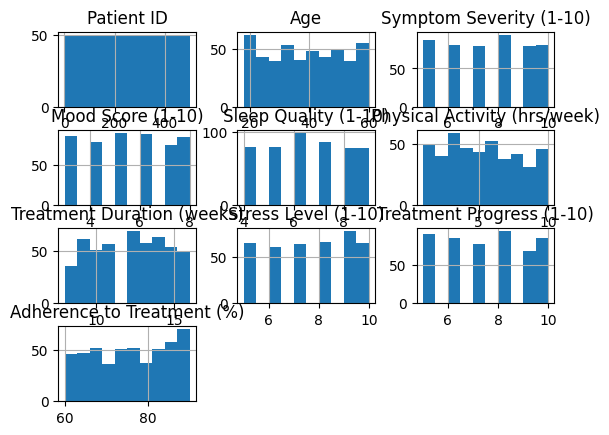

In [20]:
df.hist()

Check if the dataset is balanced.

In [21]:
df['Outcome'].value_counts()

Outcome
Deteriorated    171
Improved        170
No Change       159
Name: count, dtype: int64

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [22]:
(df.isnull().sum()/len(df)*100).reset_index().rename(columns={'index':'features',0:'%'})

,features,%
0,Patient ID,0.0
1,Age,5.0
2,Gender,0.0
3,Diagnosis,0.0
4,Symptom Severity (1-10),0.0
5,Mood Score (1-10),0.0
6,Sleep Quality (1-10),0.0
7,Physical Activity (hrs/week),10.0
8,Medication,0.0
9,Therapy Type,0.0


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

<Axes: >

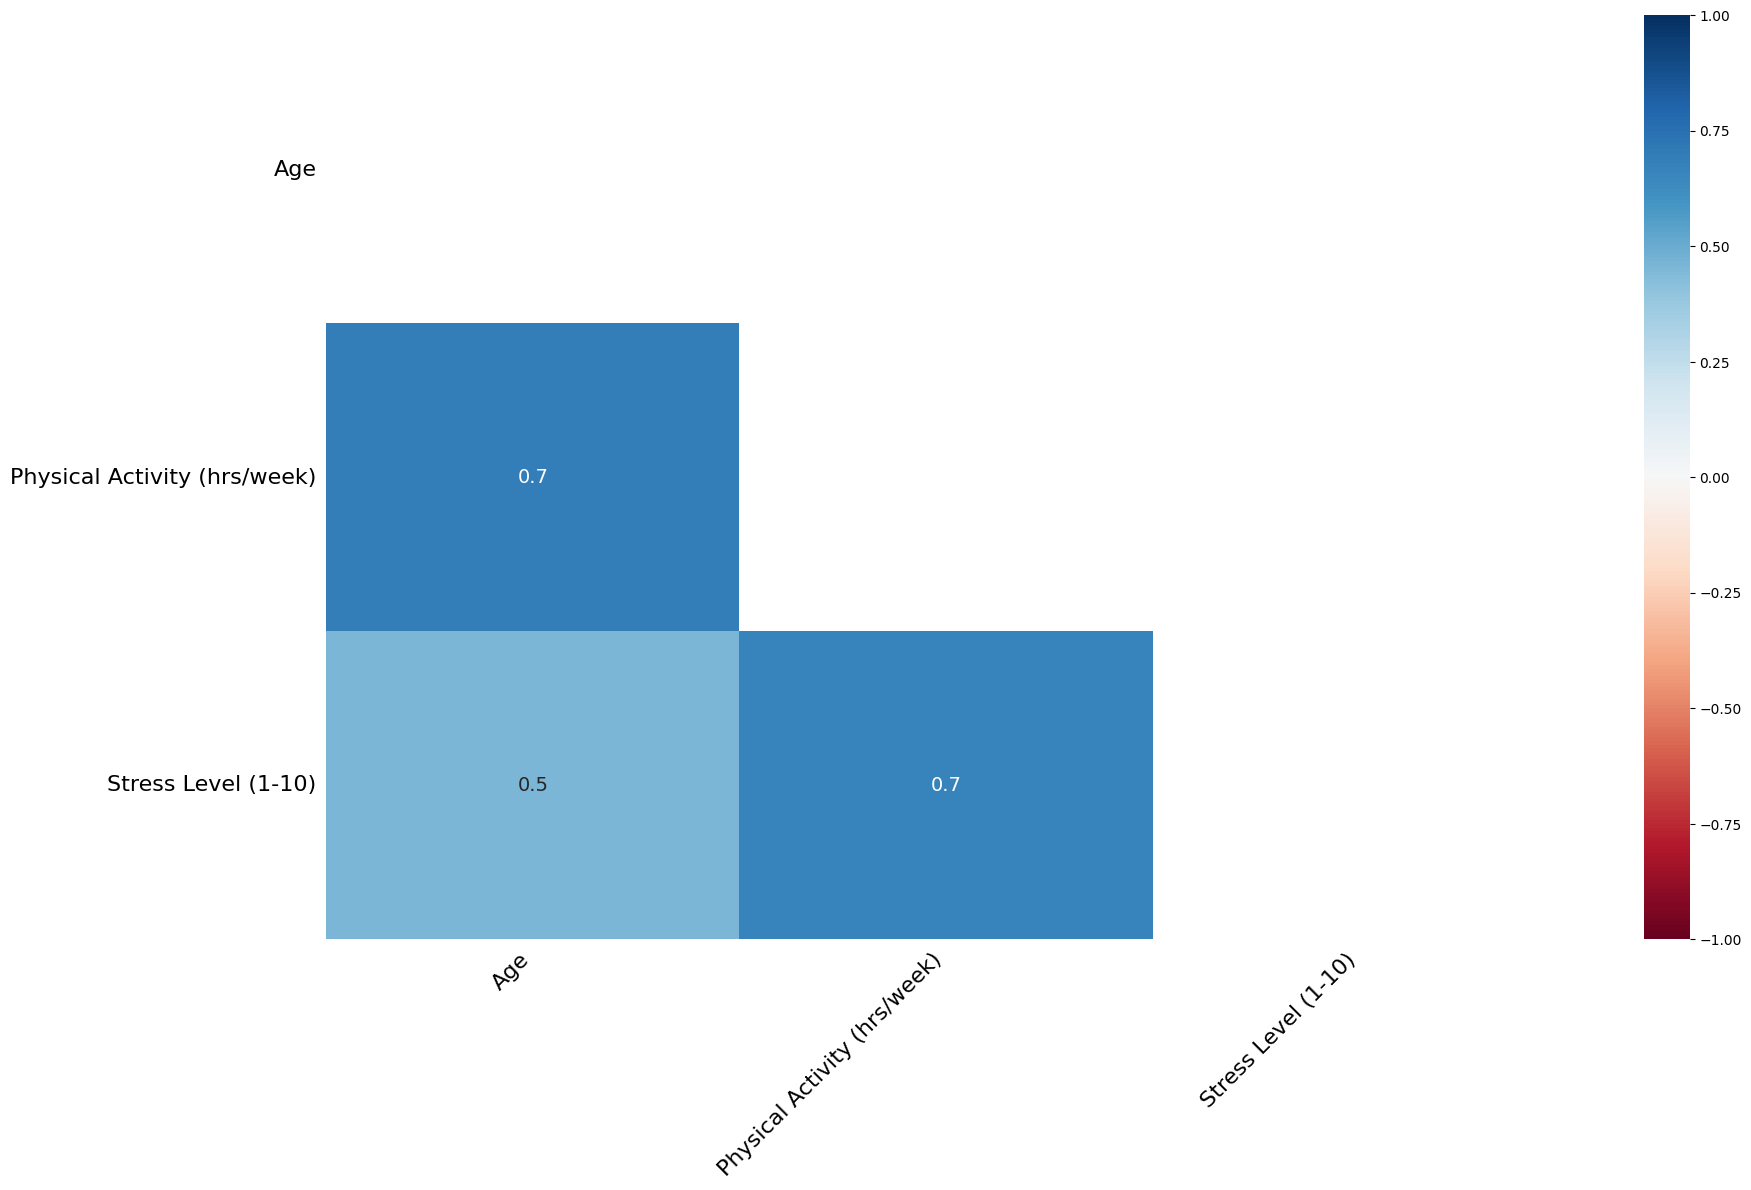

In [23]:
msno.heatmap(df)

<Axes: >

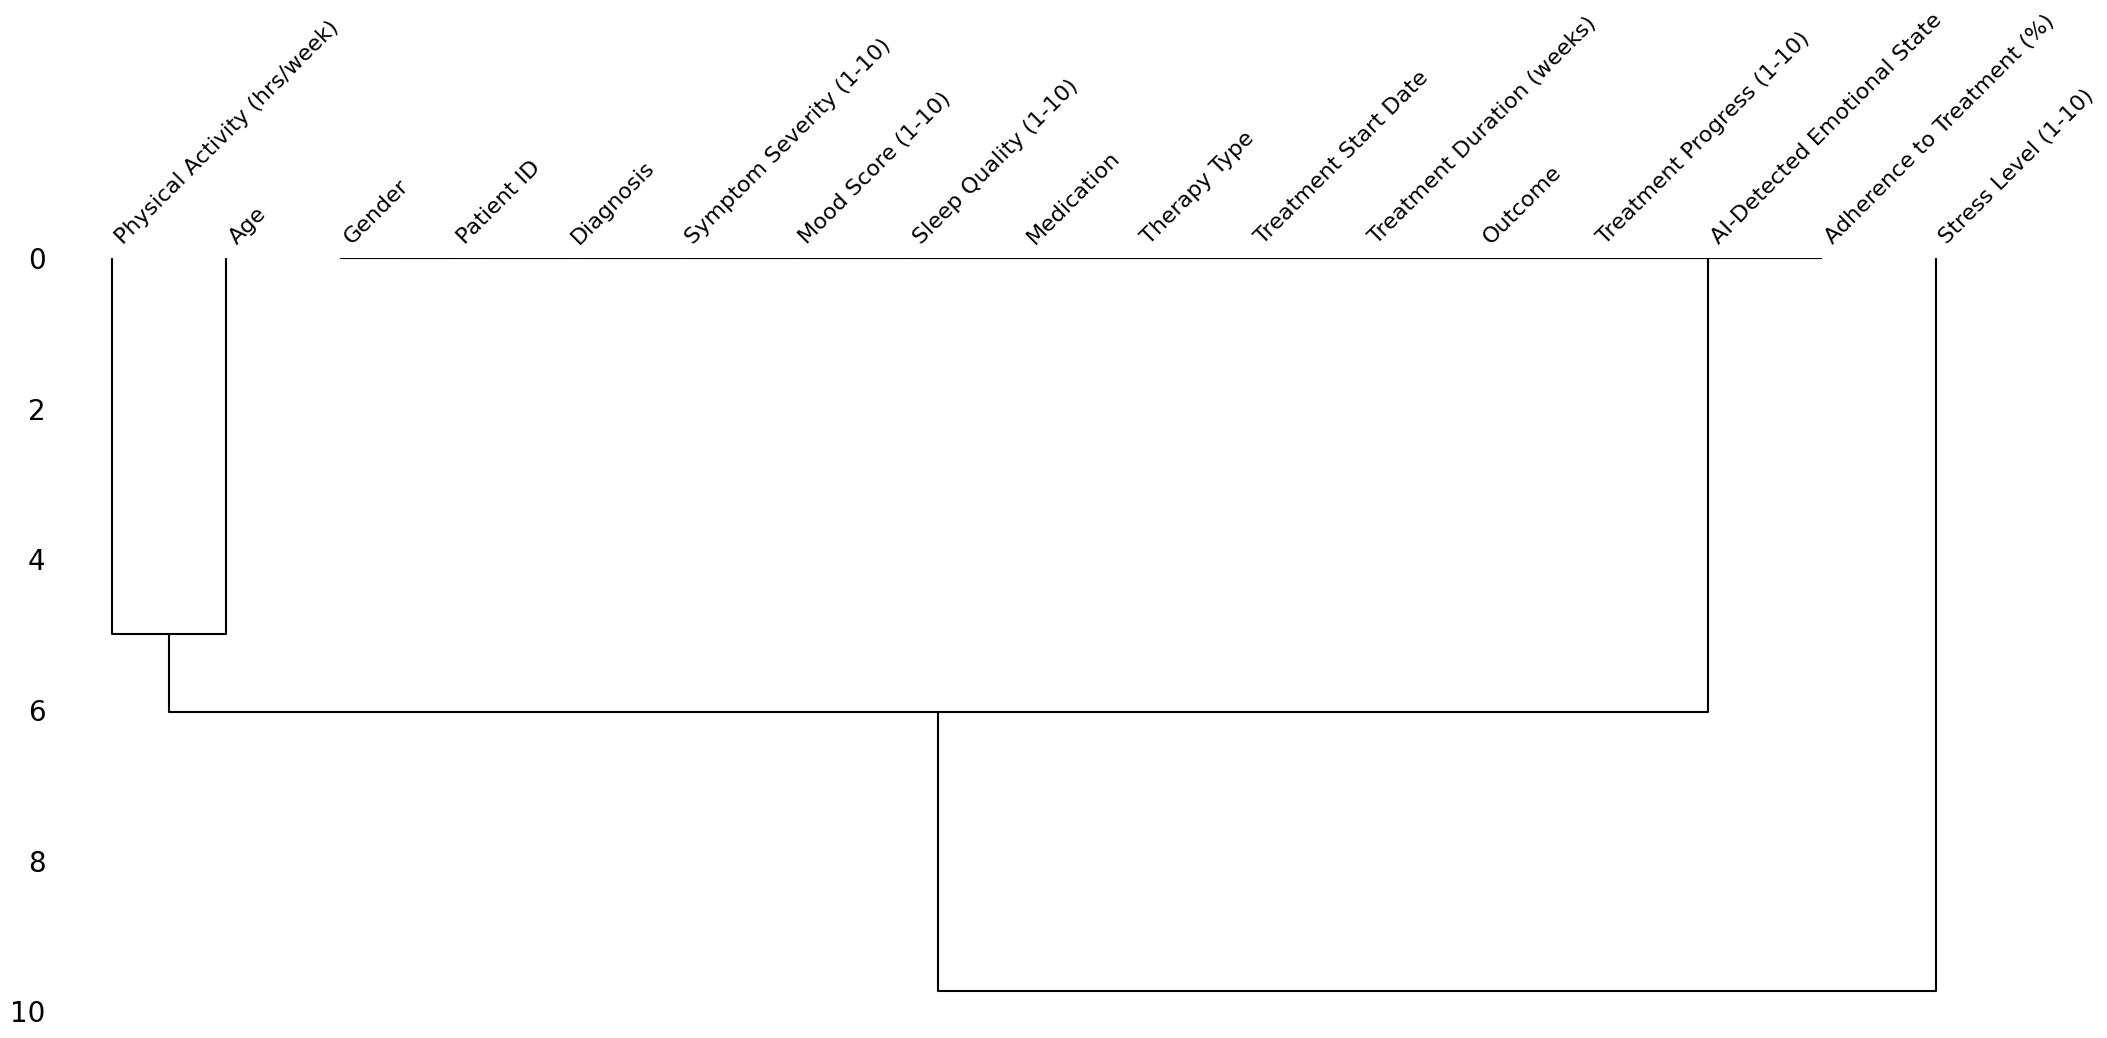

In [24]:
msno.dendrogram(df)

<Axes: >

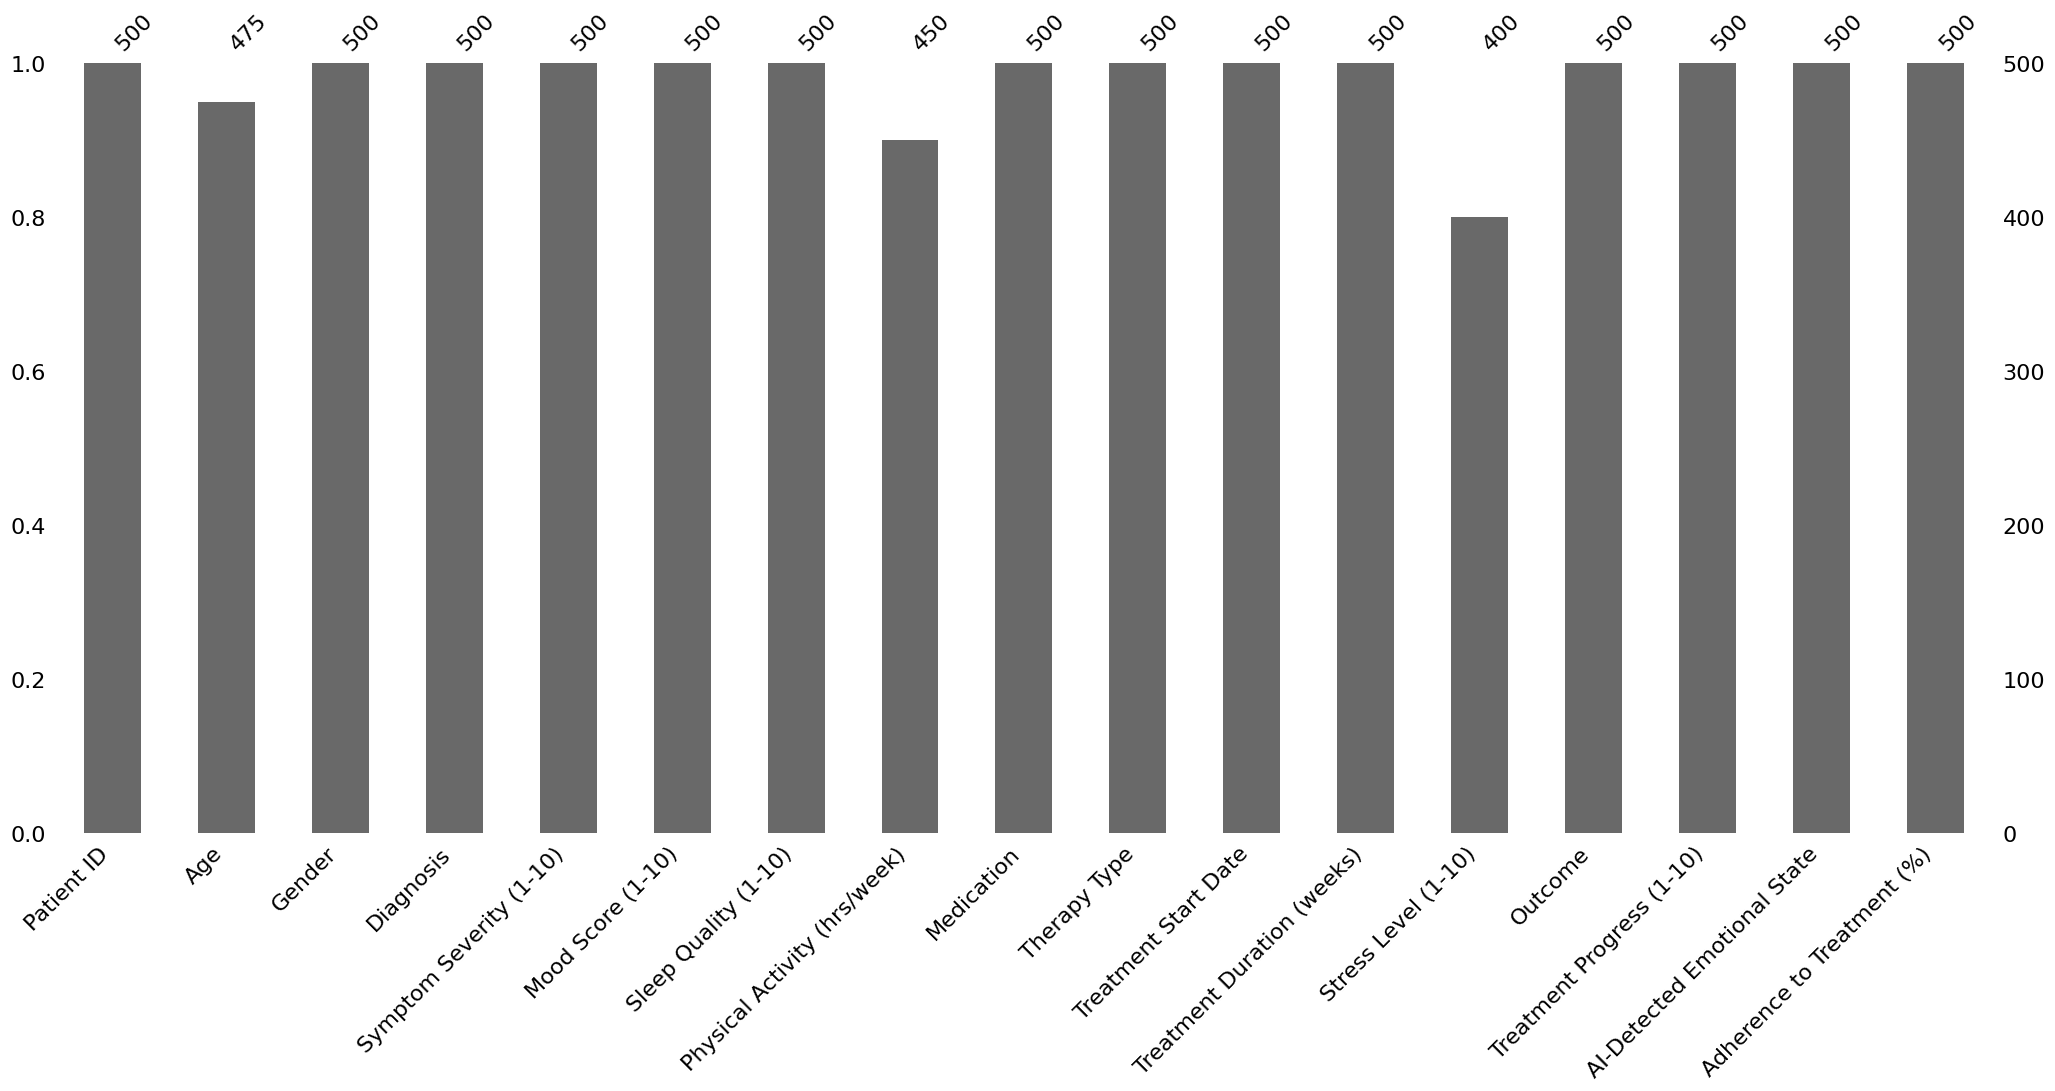

In [25]:
msno.bar(df)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [26]:
df.fillna({'Age':int(df['Age'].mean())},inplace=True)
df.fillna({'Physical Activity (hrs/week)':int(df['Physical Activity (hrs/week)'].mean())},inplace=True)
df.fillna({'Stress Level (1-10)':df['Stress Level (1-10)'].median()},inplace=True)
df.isnull().sum()

Patient ID                      0
Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Start Date            0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [27]:
le = LabelEncoder()
df['Outcome'] = le.fit_transform(df['Outcome'])

# Drop ID and non-numeric columns that won’t be used for modeling directly
X = df.drop(columns=['Patient ID', 'Outcome', 'Treatment Start Date'])
y = df['Outcome']

# Encode remaining categorical columns
X = pd.get_dummies(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Feature Scaling
Standardize the features appropriately.

In [28]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [29]:
model = XGBClassifier(max_depth=5, min_child_weight=1, n_estimators=100, n_jobs=-1, learning_rate=0.1)
model.fit(x_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=-1, num_parallel_tree=None, ...)

Use the trained model to make predictions for the test set.

In [30]:
y_pred = model.predict(x_test_scaled)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1, 0,
       2, 1, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0,
       0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 0,
       0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0])

Assess the performance of the model by using different classification metrics.

In [31]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.37
[[19 10  5]
 [12 12 10]
 [16 10  6]]
              precision    recall  f1-score   support

           0       0.40      0.56      0.47        34
           1       0.38      0.35      0.36        34
           2       0.29      0.19      0.23        32

    accuracy                           0.37       100
   macro avg       0.35      0.37      0.35       100
weighted avg       0.36      0.37      0.36       100



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Feature Scaling
Standardize the features appropriately.

In [34]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [38]:
parameters = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 300, 700],
    'learning_rate': [0.1, 0.01, 0.05]
}

In [39]:
estimator = XGBClassifier(objective="binary:logistic",use_label_encoder=False)

In [40]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring='roc_auc',
    n_jobs=1,
    cv=10,
    verbose=0
)

In [41]:
grid_search.fit(X, y)

D:\Users\Windows\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:37:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\Users\Windows\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Users\Windows\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "D:\Users\Windows\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=No...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 300, 700]},
             scoring='roc_auc')

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [43]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)